/Users/vincent/Desktop/RA/chimeric-tools/src/chimeric_tools/Data.py:95: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(stream, compression="gzip")
/Users/vincent/Desktop/RA/chimeric-tools/src/chimeric_tools/Data.py:113: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(stream, compression="gzip")
/Users/vincent/Desktop/RA/chimeric-tools/src/chimeric_tools/Data.py:131: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(stream, compression="gzip")
/var/folders/01/z1m0rbnx48jf6lx1g61vx93m0000gp/T/ipykernel_74293/176025628.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

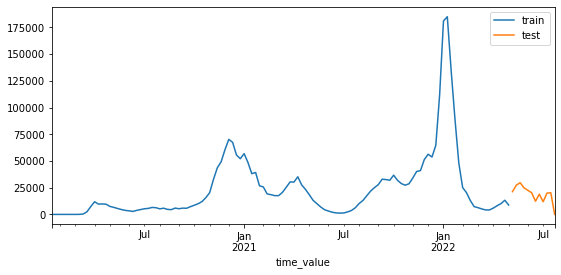

In [3]:
# Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from chimeric_tools.Data import covid_data

pa_data = covid_data(geo_values=["42"])
data = pa_data
data['time_value'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

data = data.set_index("time_value")
data = data.asfreq('W')
data = data.sort_index()
data
# data['time_value'] = pd.to_datetime(data['time_value'], format='%Y-%m-%d')

# data = data.set_index("time_value")
# data = data.asfreq('D')
# data = data.sort_index()
# data

# Split train-test
# ==============================================================================
# use last 12 weeks as test
steps = 12
data_train = data[:-steps]
data_test  = data[-steps:]

# Plot
# ==============================================================================
fig, ax=plt.subplots(figsize=(9, 4))
data_train['cases'].plot(ax=ax, label='train')
data_test['cases'].plot(ax=ax, label='test')
ax.legend()

In [4]:
# Create and fit forecaster
# ==============================================================================
forecaster = ForecasterAutoregMultiOutput(
                    regressor = Ridge(),
                    steps     = steps,
                    lags      = 15
                )

forecaster.fit(y=data_train['cases'])
forecaster

# Predict
# ==============================================================================
predictions = forecaster.predict(steps=steps)
# predictions_train = forecaster.predict(data=data_train['value'])

In [7]:
predictions

2022-05-08    -1339.816864
2022-05-15    -7705.802732
2022-05-22   -20292.775283
2022-05-29   -35439.643155
2022-06-05   -45758.941072
2022-06-12   -58032.568764
2022-06-19   -61291.809812
2022-06-26   -57091.760868
2022-07-03   -52981.612848
2022-07-10   -45881.012902
2022-07-17   -32104.815958
2022-07-24   -19144.292755
Freq: W-SUN, Name: pred, dtype: float64

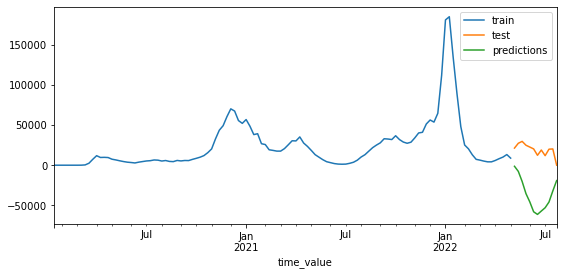

In [6]:
# Plot predictions
# ==============================================================================
fig, ax=plt.subplots(figsize=(9, 4))
data_train['cases'].plot(ax=ax, label='train')
data_test['cases'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend()

In [16]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
#  Create and fit forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = Ridge(),
                lags      = 15
             )
forecaster.fit(y=data_train['cases'])
# Prediction intervals
# ==============================================================================
predictions = forecaster.predict_interval(
                    steps    = steps+4,
                    interval = [5, 95],
                    n_boot   = 500
              )

predictions.head(4)


,pred,lower_bound,upper_bound
2022-05-08,3514.771349,-5656.450012,18038.167243
2022-05-15,6000.257618,-16169.121524,32809.799046
2022-05-22,12126.168150,-22285.318984,46878.504064
2022-05-29,17307.849761,-19336.716839,69343.846295


In [18]:
predictions

,pred,lower_bound,upper_bound
2022-05-08,3514.771349,-5656.450012,18038.167243
2022-05-15,6000.257618,-16169.121524,32809.799046
2022-05-22,12126.168150,-22285.318984,46878.504064
2022-05-29,17307.849761,-19336.716839,69343.846295
2022-06-05,20815.677514,-20997.644574,72307.547879
2022-06-12,23111.401783,-21565.791558,67988.708518
2022-06-19,24555.501112,-23513.417790,67892.523577
2022-06-26,25520.207724,-23331.138091,71203.384074
2022-07-03,26252.281544,-24433.107733,77913.509924
2022-07-10,27455.276366,-21013.381300,80923.829117


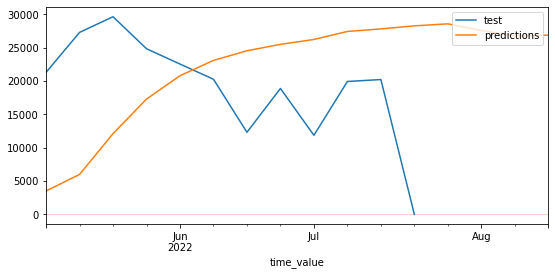

In [19]:
# Plot predictions and interval
# ==============================================================================
fig, ax=plt.subplots(figsize=(9, 4))
data_test['cases'].plot(ax=ax, label='test')
predictions['pred'].plot(ax=ax, label='predictions')
ax.fill_between(
    predictions.index,
    predictions['lower_bound']>=0,
    # predictions['upper_bound'],
    color = 'red',
    alpha = 0.2,
    # label = 'prediction_interval'
)
ax.legend(loc='upper right')

In [23]:
predictions['pred'][:-4]

2022-05-08     3514.771349
2022-05-15     6000.257618
2022-05-22    12126.168150
2022-05-29    17307.849761
2022-06-05    20815.677514
2022-06-12    23111.401783
2022-06-19    24555.501112
2022-06-26    25520.207724
2022-07-03    26252.281544
2022-07-10    27455.276366
2022-07-17    27837.836033
2022-07-24    28296.679763
Freq: W-SUN, Name: pred, dtype: float64

In [29]:
from scipy.stats import norm
def cal_miu(prediction,test):
    pair = np.array(list(zip(prediction,test)))
    sigma = np.std(pair)
    return sigma
def get_quantile(quantial,predicion,sigma):
    qutial = quantial
    miu_1week = predicion[0]
    miu_2week = predicion[1]
    miu_3week = predicion[2]
    miu_4week = predicion[3]
    ppf_list_1week = norm.ppf(qutial,miu_1week,sigma)
    ppf_list_2week = norm.ppf(qutial,miu_2week,sigma)
    ppf_list_3week = norm.ppf(qutial,miu_3week,sigma)
    ppf_list_4week = norm.ppf(qutial,miu_4week,sigma)
    return ppf_list_1week,ppf_list_2week,ppf_list_3week,ppf_list_4week

def plot_quantial(quantial,ppf_list,weeks):
    plt.plot(quantial,ppf_list)
    plt.xlabel('quantile')
    plt.ylabel('ppf')
    plt.title(weeks+' week')
    plt.show()
quantial = [0.025,0.100,0.250,0.500,0.750,0.900,0.975]
sigma = (cal_miu(predictions['pred'][:-4],data_test['cases']))
ppf_list_4weeks = get_quantile(quantial,predictions['pred'][-4:],sigma)
plot_quantial(quantial,quantial[1],'1week')

AttributeError: 'numpy.ndarray' object has no attribute 'plot'